#Lista 1
-------------


**Objetivo**: Treinar modelos de classificação utilizando Regressão Logística e Árvore de Decisão.


**Banco de Dados**: Detecção de Doenças no Fígado


[Link para o banco](https://drive.google.com/file/d/1jnLwuv4e_ZeCqluMXs3Mar2TGetumtVv/view?usp=drive_link) 


Descrição do banco:
> Este banco de dados contém registros de 416 pacientes diagnosticados com doença no fígado e 167 pacientes sem a doença. Esta informação está na coluna `Selector`.
>
> O banco de dados possui 10 variáveis:
>
> * `age`: idade
> * `Gender`: gênero do paciente
> * `TB`: Bilirrubina total
> * `DB`: Bilirrubina direta
> * `Alkphos`: fosfatase alcalina.
> * `Sgpt`: transaminase glutâmico-pirúvica sérica (TGP)
> * `Sgot`: transaminase glutâmico-oxalacética sérica (TGO)
> * `TP`: Proteína total
> * `ALB`: Albumina
> * `A/G Ratio`: Relação Albumina:Globulina


Exercício:


1. Carregue o banco de dados e analise suas features (calcule as descritivas).  
* Transforme a feature sexo em uma variavel dummy.
2. Separe o banco dados:
* Utilize 80% dos dados para treino e 20% para teste.
3. Treine um modelo de Regressão Logística.
* Interprete dois coeficientes.
4. Treine um modelo de árvore de decisão. 
* Utilize max_depth de 4.
* Identifique as duas features mais importantes.
5. Construa um relatório comparativo dos dois modelos:
* Utilizando a **precisão da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?
* Utilizando o **f1-score da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?


Obs.: Utilize o **mesmo** conjunto de treino e teste para construir e avaliar ambos os modelos.

## 1. Carga do banco
--------------------

In [1]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./dataset/Indian Liver Patient Dataset (ILPD).csv')

### 1.2. Limpeza dos Dados
--------------------

In [2]:
# Rename columns, remove white spaces and special caracters override by underscore and turn to lower case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_').str.replace('-', '_')

In [3]:
# Check for missing values
if(df.isnull().values.any()):
    df['a_g_ratio'].fillna(df['a_g_ratio'].mean(), inplace=True)    

/var/folders/bw/1sh_h7vd347d33_w29khkbbm0000gn/T/ipykernel_38653/523481476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['a_g_ratio'].fillna(df['a_g_ratio'].mean(), inplace=True)


### 1.3. Informações e Estatisticas Básicas do Dataset
--------------------

In [4]:
# Descrbie main statistics
df.describe()

,age,tb,db,alkphos,sgpt,sgot,tp,alb,a_g_ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
df['a_g_ratio'].fillna(df['a_g_ratio'].mean(), inplace=True)

/var/folders/bw/1sh_h7vd347d33_w29khkbbm0000gn/T/ipykernel_38653/3685742803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['a_g_ratio'].fillna(df['a_g_ratio'].mean(), inplace=True)


In [6]:
# Transform gender column into dummy variables
df = pd.get_dummies(df, columns=['gender'])

In [45]:
df.kurtosis(skipna=True)

# Interpretação
    # Kurtose > 3: A distribuição é leptocúrtica, as caudas são mais pesadas que as da distribuição normal e há muitos outliers.
    # Kurtose < 3: A distribuição é platicúrtica, as caudas são mais finas que as da distribuição normal e há menos outliers.
    # Kurtose = 3: A distribuição é mesocúrtica, com caudas semelhantes às da distribuição normal.

age               -0.560066
tb                37.163792
db                11.352529
alkphos           17.752828
sgpt              50.579450
sgot             150.919884
tp                 0.233039
alb               -0.387905
a_g_ratio          3.325137
selector          -1.106735
gender_Female     -0.566947
gender_Male       -0.566947
dtype: float64

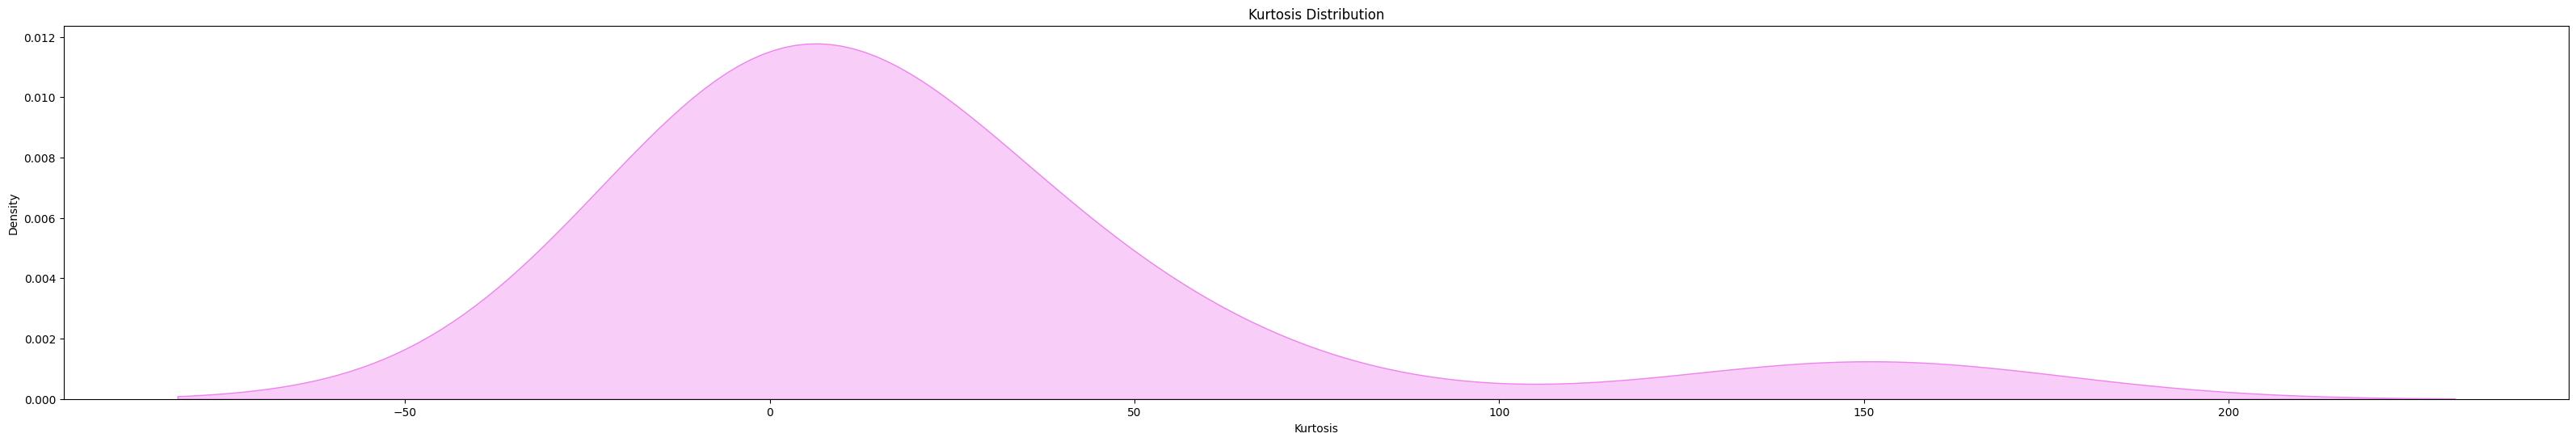

In [8]:
plt.figure(figsize=(40, 6))
plt.title('Kurtosis Distribution')
plt.xlabel('Kurtosis')
plt.ylabel('Density')

sns.kdeplot(df.kurtosis(), color='violet', fill=True, legend=True, alpha=0.4)

plt.show();

Kurtose Alta:
Os valores de kurtose mais elevados, que se estendem para mais de 100, indicam que a distribuição possui caudas mais grossas do que o normal, características de uma distribuição leptocúrtica. Isso significa que essa distribuição tem muitos valores extremos, ou outliers.


Implicações:
Distribuições com kurtose alta são mais propensas a ter eventos extremos (outliers) do que distribuições normais (mesocúrticas), o que pode impactar análises estatísticas, tornando-as mais sensíveis a essas observações extremas.

## 2. Quebra do banco
--------------------

In [9]:
# import scikit-learn libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and test set
X = df.drop('selector', axis=1)
y = df['selector']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Primeiro modelo - Regressão Logistica
--------------------

In [47]:
# Import Logistic Regression from scikit-learn
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

## 3.1 Interpretação de dois coeficientes
--------------------

In [48]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Metrics to evaluate the model
confusion_matrix(y_test, y_pred)


array([[80,  7],
       [22,  8]])

In [49]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Metrics to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.92      0.85        87
           2       0.53      0.27      0.36        30

    accuracy                           0.75       117
   macro avg       0.66      0.59      0.60       117
weighted avg       0.72      0.75      0.72       117



## Conclusão:
O modelo se sai muito bem na Classe 1, mas apresenta desempenho fraco na Classe 2. Se a detecção da Classe 2 for crítica, seria importante ajustar o modelo, talvez balanceando as classes ou utilizando outras técnicas para melhorar a detecção dessa classe.


## 4. Segundo modelo - Árvore de Decisão. 
--------------------

In [50]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)

# Predict the test set
y_pred = dt_model.predict(X_test)

print(f'Accuracy: {dt_model.score(X_test, y_test)}')

Accuracy: 0.7264957264957265


In [52]:
# Metrics to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        87
           2       0.47      0.47      0.47        30

    accuracy                           0.73       117
   macro avg       0.64      0.64      0.64       117
weighted avg       0.73      0.73      0.73       117



## 4.1 Duas features mais importantes
--------------------

In [ ]:
# What is the most important features?
importances = dt_model.feature_importances_

# Print importances values for each feature 
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')
    

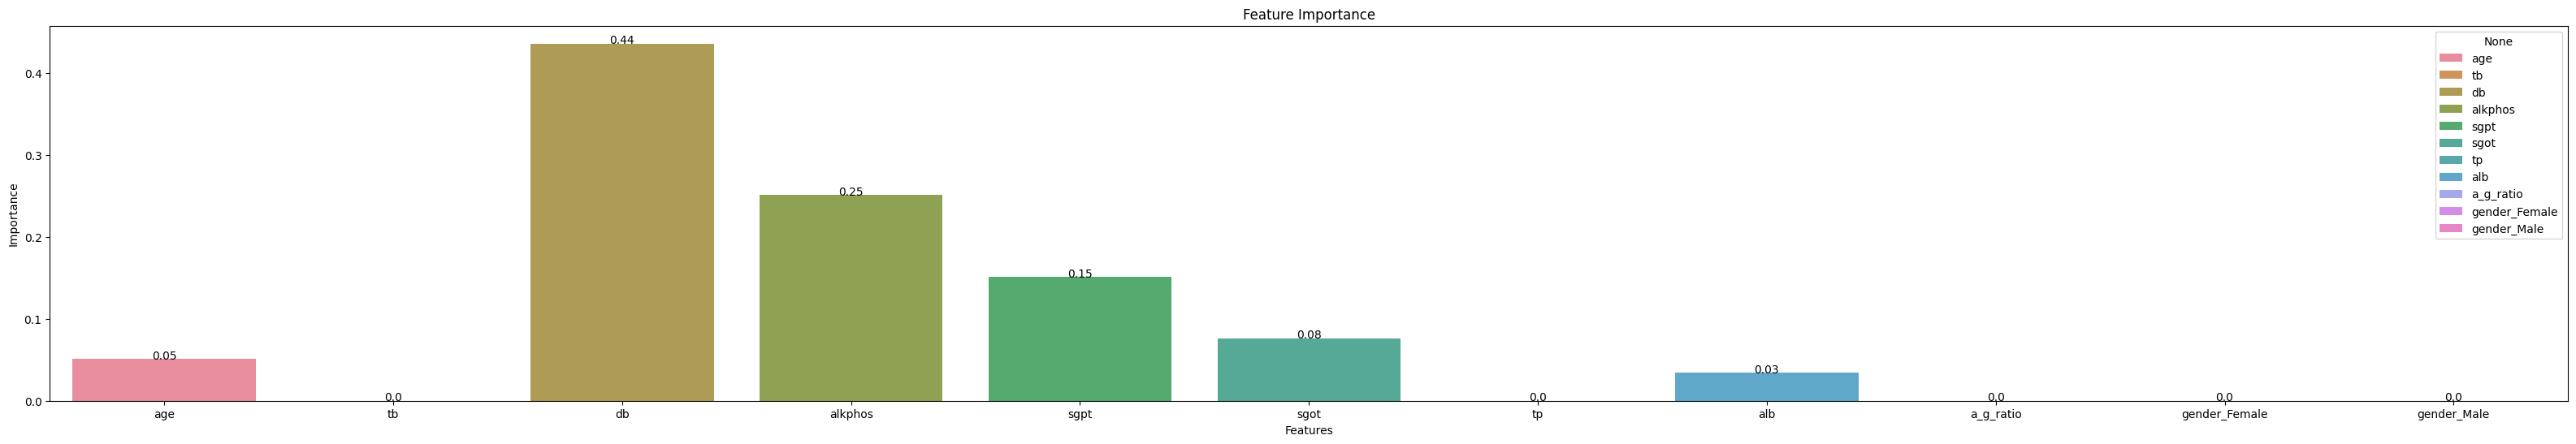

In [32]:
# Plot a chart with the most important features
plt.figure(figsize=(40, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

sns.barplot(x=X.columns, y=importances, alpha=0.9, legend=True, hue=X.columns, dodge=False);

# Add column values to the chart
for i in range(len(X.columns)):
    plt.text(i, importances[i], round(importances[i], 2), ha = 'center');

plt.show();

In [34]:
print('The most important feature is: ', X.columns[importances.argmax()])
print('The second most important feature is: ', X.columns[importances.argsort()[-2]])

The most important feature is:  db
The second most important feature is:  alkphos


## 5. Avaliação do modelo
--------------------

# Avaliação de Resultados do Modelo


### Conclusão
O modelo apresenta desempenho significativamente melhor na classe 1, mas enfrenta dificuldades na previsão correta da classe 2. A baixa precisão para a classe 2 (0.47) indica muitas previsões incorretas. Isso pode ser atribuído a um desequilíbrio entre as classes, sugerindo a necessidade de técnicas para lidar com esse problema, como balanceamento de dados ou ajuste do threshold de decisão. No geral, o modelo tem uma precisão boa (0.82), mas o desempenho da classe minoritária requer melhorias.


## 5.1 Qual modelo escolhido olhando para a precisão de detecção de doença no fígado?
--------------------

## Análise de Resultados - Modelo 1 vs Modelo 2

Para avaliar a precisão da detecção, analisamos o **recall** (responsável por medir a capacidade do modelo de identificar corretamente as respostas positivas). Os resultados obtidos para os dois modelos são os seguintes:

### Modelo 2 - Árove de Decisão

| Classe     | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| Classe 1   | 0.82      | 0.82   | 0.82     | 87      |
| Classe 2   | 0.47      | 0.47   | 0.47     | 30      |

### Modelo 1: - Regressão Logistica

| Classe     | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| Classe 1   | 0.84      | 0.76   | 0.80     | 87      |
| Classe 2   | 0.45      | 0.57   | 0.50     | 30      |

### Conclusões:

- **Recall**: O **Modelo 1** apresenta um **recall** superior para a Classe 2 (0.57), o que significa que ele é mais eficaz em detectar casos positivos dessa classe em comparação com o Modelo 2 (recall de 0.47).
  
- **Precision**: Ambos os modelos apresentam valores de precisão baixos


## 5.2 Qual modelo escolhido olhando para o f1-score do rótulo de doença do fígado?
--------------------

## Qual Modelo Escolher?

A escolha do modelo depende do que é mais importante para o seu caso de uso:

- **Se o foco é detectar o máximo possível de casos positivos (priorizando recall)**, o **Modelo 1** é a melhor escolha, pois ele tem um recall maior (0.57 para a Classe 2), sendo mais eficaz na identificação de respostas positivas.

- **Se a precisão for mais importante (evitar falsos positivos)**, o **Modelo 2** pode ser mais adequado, já que ele tem uma ligeira vantagem em precisão (0.47 vs 0.45 para a Classe 2).

### Recomendação:
Deviso ao cenário de detecção de doenças, a opção escolhida seria a do Model 1 - Regressão Logistica, por ter um recall melhor, mesmo com uma precisão um pouco inferior
